### Import libs

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Import data

In [73]:
rand_state = 1000

In [74]:
df_american = pd.read_csv(r'/Users/dilianaserafimova/Desktop/df_american_clean.csv')

In [75]:
df_american = df_american.set_index(['date'])

### Scaling the features

In [76]:
#saving a copy of y_test for calculating the metrics and plotting
y_test_orig = df_american['pax_count'][163:]

In [77]:
scale = StandardScaler()
df_sc = scale.fit_transform(df_american)
df_sc = pd.DataFrame(df_sc, columns=df_american.columns)

In [78]:
df_sc.head()

,pax_count,revenue,seat_miles,load_factor,flights
0,-0.788545,-1.005916,-0.393290,-3.113601,0.643541
1,-1.073975,-1.352662,-0.972810,-2.708271,0.167896
2,-0.518589,-0.815759,-0.426511,-2.070044,0.595362
3,-0.749340,-1.032299,-0.646341,-2.309659,0.420916
4,-0.598091,-0.863017,-0.605210,-1.608729,0.429720


### Defining the variables and splitting the data

In [79]:
y = df_sc['pax_count']
X = df_sc.drop('pax_count', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, shuffle=False)

###  Fit the model

In [80]:
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

### Make a prediction 

In [81]:
test_pred = SVM_regression.predict(X_test)

In [82]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_pred':test_pred})
predictions.head()

,y_test,y_pred
163,1.710910,1.824116
164,1.059114,1.198469
165,1.297744,1.370608
166,1.036735,0.952049
167,1.267728,1.344402


---

#    *Grid Search*

---

### Defining the hyperparameters 

In [83]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [84]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [85]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

### Fit the model with the optimized parameters

In [86]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [87]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [88]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

### Predict the optimized model

In [89]:
test_pred_optimized = grid.predict(X_test)

In [90]:
predictions['y_pred_optimized'] = test_pred_optimized
predictions.head()

,y_test,y_pred,y_pred_optimized
163,1.710910,1.824116,1.930999
164,1.059114,1.198469,1.178138
165,1.297744,1.370608,1.351438
166,1.036735,0.952049,0.899518
167,1.267728,1.344402,1.351882


---

#    *Plotting*

---

### Plot of the regular model

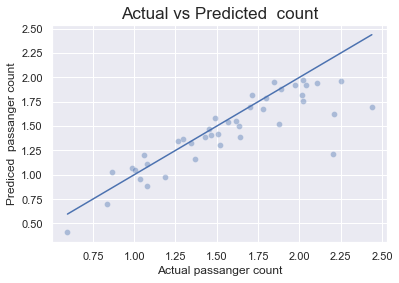

In [91]:
sns.scatterplot(x=y_test, y=test_pred, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

### Plot of the optimized model

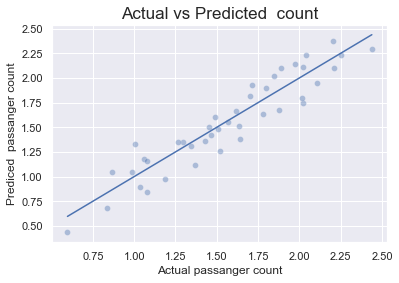

In [92]:
sns.scatterplot(x=y_test, y=test_pred_optimized, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

---

#    *Evaluation*

---

### 1) Regular model 

#### Invert scaling 

In [93]:
X_test.index = np.arange(0, len(X_test))

In [94]:
test_pred = pd.DataFrame(test_pred)

In [95]:
test_pred_df = test_pred.join(X_test)

In [96]:
scale_test_pred = pd.DataFrame(scale.inverse_transform(test_pred_df, copy=True))

In [97]:
test_pred_inv = scale_test_pred[0]

#### MAE and RMSE 

In [98]:
MAE = (round(mean_absolute_error(y_test_orig, test_pred_inv),2))
print("Test Score: %.2f MAE" % (MAE))

Test Score: 376691.34 MAE


In [99]:
RMSE = math.sqrt(mean_squared_error(y_test_orig, test_pred_inv))
print("Test Score: %.2f RMSE" % (RMSE))

Test Score: 581095.53 RMSE


### 2) Optimized model

#### Invert scaling 

In [100]:
test_pred_optimized = pd.DataFrame(test_pred_optimized)

In [101]:
test_pred_opt_df = test_pred_optimized.join(X_test)

In [102]:
scale_test_pred_opt = pd.DataFrame(scale.inverse_transform(test_pred_opt_df, copy=True))

In [103]:
test_pred_opt_inv = scale_test_pred_opt[0]

#### MAE and RMSE 

In [104]:
MAE_opt = (round(mean_absolute_error(y_test_orig, test_pred_opt_inv),2))
print("Test Score: %.2f MAE" % (MAE_opt))

Test Score: 321627.61 MAE


In [105]:
RMSE_opt = math.sqrt(mean_squared_error(y_test_orig, test_pred_opt_inv))
print("Test Score: %.2f RMSE" % (RMSE_opt))

Test Score: 368686.09 RMSE


---

#    *Export Forecast*

---

In [106]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines


In [107]:
test_pred_optimized.to_csv('predictions_svr_optimized.csv')

In [108]:
test_pred.to_csv('predictions_svr.csv')